# Multiple Linear Regression

## Importing the libraries

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [101]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ai-study/my/regression/dataset/50_Startups.csv')

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


굉장히 작은 데이터 셋이지만, 학습 목적으로 사용해 본다.

In [103]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [104]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Encoding categorical data

In [105]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = ct.fit_transform(X)

print(X[:5])

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]


## Splitting the dataset into the Training set and Test set

- train & test

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [107]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train[:, 3:] = ss.fit_transform(X_train[:, 3:])
X_test[:, 3:] = ss.transform(X_test[:, 3:])

In [108]:
print(X_train[:5])

[[0.0 1.0 0.0 0.3420214917054793 0.2278767782056234 0.12425037675982561]
 [0.0 1.0 0.0 1.3620784917345992 -1.097473695438894 1.1499068756530315]
 [1.0 0.0 0.0 -0.7108129728948954 -2.5770185976138653 -0.3413682525763912]
 [0.0 0.0 1.0 0.9061143813653676 1.0172367029234282 0.6689018532376049]
 [0.0 0.0 1.0 1.409970875138404 -0.09115402570882848 1.300068606323669]]


- train & validation

In [109]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

## Training the Multiple Linear Regression model on the Training set

In [110]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Evaluate model

In [111]:
from sklearn.metrics import r2_score

y_pred = lr.predict(X_val)

r2_score(y_val, y_pred)

0.9539482451476431

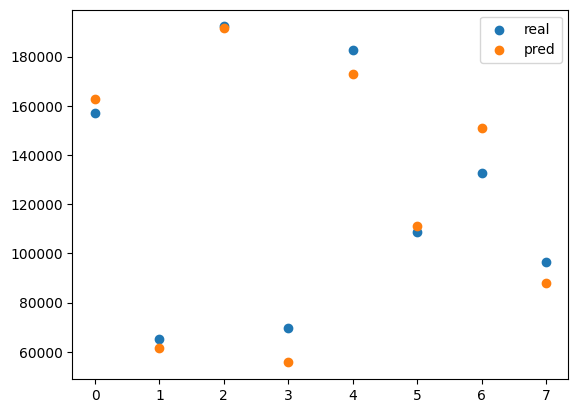

In [112]:
import matplotlib.pyplot as plt

plt.scatter(range(len(y_val)), y_val, label='real')
plt.scatter(range(len(y_pred)), y_pred, label='pred')
plt.legend(['real', 'pred'])
plt.show()

## Predicting the Test set results

In [113]:
lr.predict(X_test)

array([126849.35999376,  83222.917118  , 100537.34842181,  42865.50233081,
       127389.9688799 ,  46253.33904235, 111312.60639933, 100673.12586038,
        97447.10010132, 111735.34189084])